In [1]:
import os
import re
import string
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import zipfile
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
import nltk

# Download necessary NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import requests

url = 'http://nlp.stanford.edu/data/glove.6B.zip'
response = requests.get(url)
with open('glove.6B.zip', 'wb') as file:
    file.write(response.content)

In [4]:
import zipfile

zip_file_path = 'glove.6B.zip'
extract_to_path = 'glove.6B'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print(f'Extracted {zip_file_path} to {extract_to_path}')

Extracted glove.6B.zip to glove.6B


In [5]:
# download pretrained GloVe word embeddings
#! wget http://nlp.stanford.edu/data/glove.6B.zip

In [6]:
#! unzip glove*.zip

In [7]:
gloveFile = r"C:\Users\DELL\Desktop\mini\glove.6B\glove.6B.300d.txt"
dim=300

In [8]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def rem_ascii(s):
    return "".join([c for c in s if ord(c) < 128 ])

# Cleaning the text sentences so that punctuation marks, stop words and digits are removed.
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop and i not in prepositions_articles])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    processed = re.sub(r"\d+","",punc_free)
    return processed


def lemmatize_text(text):
    return " ".join([lemma.lemmatize(word) for word in word_tokenize(text)])

def loadGloveModel(gloveFile):
    word_embeddings = {}
    f = open(gloveFile, encoding='utf-8')
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        word_embeddings[word] = coefs
    f.close()
    return word_embeddings



In [9]:
prepositions_articles = set(["on", "in", "at", "since", "for", "ago", "before", "to", "by", "beside", "under", "between",
                             "after", "over", "with", "without", "about", "above", "of", "and", "or", "an","the","a"])

In [10]:
word_embeddings = loadGloveModel(gloveFile)

In [11]:
print("Vocab Size = ",len(word_embeddings))

Vocab Size =  400000


In [12]:
text = """The dog is a pet animal. A dog has sharp teeth so that it can eat flesh very easily, it has four legs, two ears, two eyes, a tail, a mouth, and a nose. It is a very clever animal and is very useful in catching thieves. It runs very fast, barks loudly and attacks the strangers. A dog saves the life of the master from danger. One can find dogs everywhere in the world. Dogs are a very faithful animal. It has a sharp mind and a strong sense of hearing smelling the things. It also has many qualities like swimming in the water, jumping from anywhere, good smelling sense. Usually, the dog eats fish, meat, milk, rice, bread, etc. Dogs are sometimes called canines. Dogs are sometimes referred to as man’s best friend because they are kept as domestic pets and are usually loyal and like being around humans. They are also helpful in reducing stress, anxiety, and depression, loneliness, encourage exercise and playfulness and even improve your cardiovascular health. A dog also provides valuable companionship for older adults. The dogs are so loyal to his master that nothing can induce him to leave his master. His master might be a poor man or even a beggar but still, the dog will not leave his master from far off. Dogs see their master coming home from work they rush to them and jump on them to show their love. Dogs are honest friends who are always ready to die to save a friend. It can bite a thief or stranger when they ignore its barking and try to mischief. Dogs always give security to the owner day and night."""
print(text)

The dog is a pet animal. A dog has sharp teeth so that it can eat flesh very easily, it has four legs, two ears, two eyes, a tail, a mouth, and a nose. It is a very clever animal and is very useful in catching thieves. It runs very fast, barks loudly and attacks the strangers. A dog saves the life of the master from danger. One can find dogs everywhere in the world. Dogs are a very faithful animal. It has a sharp mind and a strong sense of hearing smelling the things. It also has many qualities like swimming in the water, jumping from anywhere, good smelling sense. Usually, the dog eats fish, meat, milk, rice, bread, etc. Dogs are sometimes called canines. Dogs are sometimes referred to as man’s best friend because they are kept as domestic pets and are usually loyal and like being around humans. They are also helpful in reducing stress, anxiety, and depression, loneliness, encourage exercise and playfulness and even improve your cardiovascular health. A dog also provides valuable comp

In [13]:
sentences = sent_tokenize(text)
cleaned_texts = [rem_ascii(clean(sentence)) for sentence in sentences]

In [14]:
sentence_vectors = []
for i in cleaned_texts:
    if len(i) != 0:
        v = sum([word_embeddings.get(w, np.zeros((dim,))) for w in i.split()])/(len(i.split())+0.001)
    else:
        v = np.zeros((dim,))
    sentence_vectors.append(v)

[[0.    0.514 0.544 0.321 0.569 0.55  0.813 0.301 0.414 0.611 0.659 0.625
  0.313 0.581 0.477 0.494 0.49  0.522 0.442 0.502]
 [0.514 0.    0.492 0.462 0.507 0.639 0.502 0.611 0.625 0.555 0.618 0.66
  0.361 0.507 0.482 0.624 0.606 0.583 0.497 0.583]
 [0.544 0.492 0.    0.38  0.518 0.534 0.554 0.42  0.54  0.423 0.534 0.585
  0.393 0.552 0.497 0.542 0.507 0.523 0.549 0.435]
 [0.321 0.462 0.38  0.    0.392 0.539 0.348 0.479 0.5   0.324 0.444 0.543
  0.319 0.387 0.366 0.475 0.526 0.504 0.459 0.526]
 [0.569 0.507 0.518 0.392 0.    0.645 0.532 0.487 0.589 0.422 0.496 0.654
  0.427 0.564 0.682 0.757 0.696 0.669 0.478 0.628]
 [0.55  0.639 0.534 0.539 0.645 0.    0.616 0.593 0.78  0.486 0.651 0.808
  0.479 0.651 0.642 0.769 0.799 0.76  0.514 0.778]
 [0.813 0.502 0.554 0.348 0.532 0.616 0.    0.349 0.465 0.529 0.696 0.693
  0.315 0.571 0.592 0.532 0.548 0.604 0.426 0.553]
 [0.301 0.611 0.42  0.479 0.487 0.593 0.349 0.    0.756 0.332 0.443 0.618
  0.581 0.477 0.517 0.635 0.668 0.613 0.509 0.638]
 

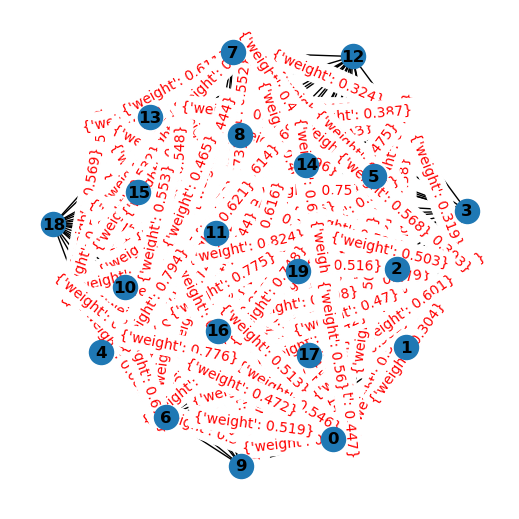

In [15]:
sim_mat = np.zeros([len(cleaned_texts), len(cleaned_texts)])
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,dim),sentence_vectors[j].reshape(1,dim))[0,0]
sim_mat = np.round(sim_mat,3)
print(sim_mat)

# Creating the network graph
nx_graph = nx.from_numpy_array(sim_mat)
plt.figure(figsize=(5, 5))
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(nx_graph,pos,font_color='red')
plt.show()

In [16]:
scores = nx.pagerank(nx_graph)
print(scores)

{0: 0.04663547717156963, 1: 0.04939319818755248, 2: 0.045749458480302624, 3: 0.040743837227688526, 4: 0.050496749210398505, 5: 0.05665267066444021, 6: 0.04861567762955979, 7: 0.04775010408795955, 8: 0.053847040876778336, 9: 0.042079941667816034, 10: 0.050519685724067946, 11: 0.058901153523495446, 12: 0.04074819748912716, 13: 0.05020045459799207, 14: 0.05125718114129963, 15: 0.05651250539735581, 16: 0.05629525899821312, 17: 0.05521667009858541, 18: 0.043518673377186984, 19: 0.054866064448610724}


In [17]:
scores = nx.pagerank(nx_graph)
ranked_sentences = sorted(((scores[i], i) for i, s in enumerate(sentences)), reverse=True)

# Arrange the top sentences
arranged_sentences = sorted(ranked_sentences[0:int(len(sentences) * 0.5)], key=lambda x: x[1])

# Store result in new variable
summarized_text = "\n".join([sentences[x[1]] for x in arranged_sentences])

# Print the summarized text (optional)
print(summarized_text)

A dog saves the life of the master from danger.
One can find dogs everywhere in the world.
It also has many qualities like swimming in the water, jumping from anywhere, good smelling sense.
Dogs are sometimes called canines.
Dogs are sometimes referred to as man’s best friend because they are kept as domestic pets and are usually loyal and like being around humans.
The dogs are so loyal to his master that nothing can induce him to leave his master.
His master might be a poor man or even a beggar but still, the dog will not leave his master from far off.
Dogs see their master coming home from work they rush to them and jump on them to show their love.
Dogs are honest friends who are always ready to die to save a friend.
Dogs always give security to the owner day and night.


In [18]:
# 2. Text Preprocessing
# Define stop words, punctuation, and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_sentence(sentence):
    # Remove punctuation
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    words = word_tokenize(sentence)
    # Remove stop words and lemmatize
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    return " ".join(words)

# Apply preprocessing to each top sentence
preprocessed_sentences = [preprocess_sentence(sentence) for sentence in summarized_text.split('\n')]

# Combine the preprocessed sentences into a single variable
preprocessed_output = "\n".join(preprocessed_sentences)

print(preprocessed_output)

dog save life master danger
one find dog everywhere world
also many quality like swimming water jumping anywhere good smelling sense
dog sometimes called canine
dog sometimes referred man ’ best friend kept domestic pet usually loyal like around human
dog loyal master nothing induce leave master
master might poor man even beggar still dog leave master far
dog see master coming home work rush jump show love
dog honest friend always ready die save friend
dog always give security owner day night


In [19]:
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to get the part of speech tag for lemmatization
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts."""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Remove punctuation from summarized_text and tokenize
def preprocess_text(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
    return " ".join(lemmatized_words)

# Store the cleaned and lemmatized text in a new variable
cleaned_summarized_text = preprocess_text(summarized_text)

# Print the cleaned and lemmatized text (optional)
print(cleaned_summarized_text)

a dog save the life of the master from danger one can find dog everywhere in the world it also have many quality like swim in the water jumping from anywhere good smell sense dog be sometimes call canine dog be sometimes refer to a man ’ s best friend because they be kept a domestic pet and be usually loyal and like be around human the dog be so loyal to his master that nothing can induce him to leave his master his master might be a poor man or even a beggar but still the dog will not leave his master from far off dog see their master come home from work they rush to them and jump on them to show their love dog be honest friend who be always ready to die to save a friend dog always give security to the owner day and night


In [20]:
file_path = os.path.join(os.getcwd(), 'paragraph.txt')
with open(file_path, 'w') as file:
    file.write(cleaned_summarized_text)

In [21]:
'''# Process the summarized text: remove punctuations, prepositions, articles, and lemmatize
cleaned_summarized_text = clean(summarized_text)
lemmatized_summarized_text = lemmatize_text(cleaned_summarized_text)

# Store the final processed text in a new variable
processed_summarized_text = lemmatized_summarized_text

# Print the processed summarized text (optional)
print(processed_summarized_text)'''

'# Process the summarized text: remove punctuations, prepositions, articles, and lemmatize\ncleaned_summarized_text = clean(summarized_text)\nlemmatized_summarized_text = lemmatize_text(cleaned_summarized_text)\n\n# Store the final processed text in a new variable\nprocessed_summarized_text = lemmatized_summarized_text\n\n# Print the processed summarized text (optional)\nprint(processed_summarized_text)'

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Example reference summary and generated summary
reference_summary = "The dog is a pet animal. A dog has sharp teeth so that it can eat flesh very easily, it has four legs, two ears, two eyes, a tail, a mouth, and a nose. A dog saves the life of the master from danger. Dogs are a very faithful animal. Usually, the dog eats fish, meat, milk, rice, bread, etc. Dogs are sometimes referred to as man`s best friend because they are kept as domestic pets and are usually loyal and like being around humans. The dogs are so loyal to his master that nothing can induce him to leave his master. His master might be a poor man or even a beggar but still, the dog will not leave his master from far off. Dogs see their master coming home from work they rush to them and jump on them to show their love. It can bite a thief or stranger when they ignore its barking and try to mischief."
generated_summary = "A dog saves the life of the master from danger. One can find dogs everywhere in the world. It also has many qualities like swimming in the water, jumping from anywhere, good smelling sense. Dogs are sometimes called canines. Dogs are sometimes referred to as man’s best friend because they are kept as domestic pets and are usually loyal and like being around humans. The dogs are so loyal to his master that nothing can induce him to leave his master from far off. Dogs see their master coming home from work they rush to them and jump on them to show their love. Dogs are honest friends who are always ready to die to save a friend. Dogs always give security to the owner day and night."

# Tokenize sentences (simple example, can be extended)
vectorizer = CountVectorizer().fit_transform([reference_summary, generated_summary])
vectors = vectorizer.toarray()

# Calculate cosine similarity between reference and generated summary
cosine_similarities = cosine_similarity(vectors[0:1], vectors[1:]).flatten()

# Print cosine similarity scores
print("Cosine Similarity Scores:", cosine_similarities)

# Example: Calculate average similarity score
average_similarity_score = sum(cosine_similarities) / len(cosine_similarities)
print("Average Similarity Score:", average_similarity_score)

Cosine Similarity Scores: [0.79705296]
Average Similarity Score: 0.7970529570775182
